In [70]:
import matplotlib.pyplot as plt

def show_results_summary(results, solver):
    print("Summary for: " + solver)
    plt.plot(results[2])
    
    plt.title(solver + ' Convergence Plot')
    plt.xlabel('Iteration')
    plt.ylabel('Average Value')
    plt.show()
    
    print("Average solution score: " + str(results[0]))
    print("Average computation time: " + str(results[1]) + " ms.")
    print("\n")

Summary for: solve_hill_climbing


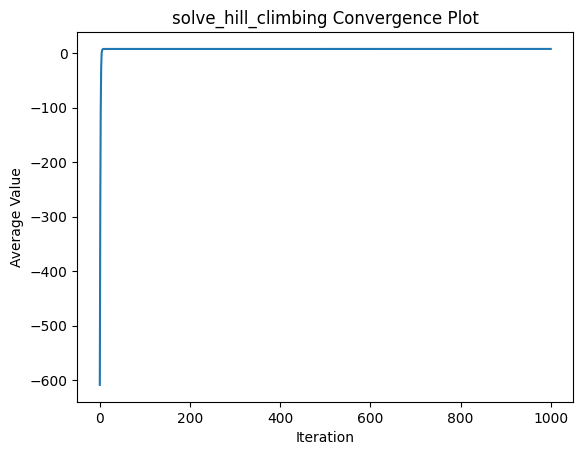

Average solution score: 7.75
Average computation time: 48217450.01 ms.


Summary for: solve_tabu


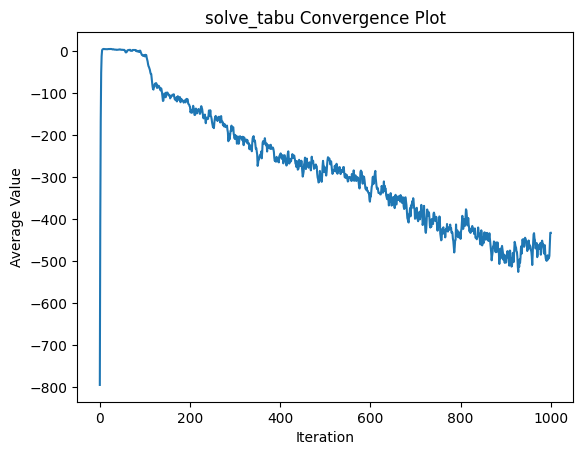

Average solution score: 10.0
Average computation time: 69459987.24 ms.


Summary for: solve_tabu_list


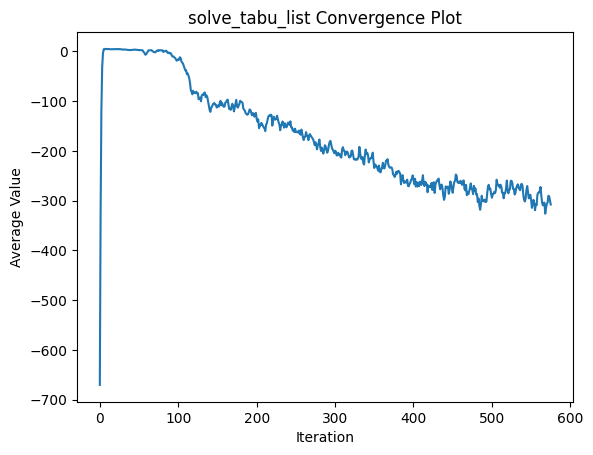

Average solution score: 10.0
Average computation time: 418601012.05 ms.


Summary for: solve_tabu_avoid_snake


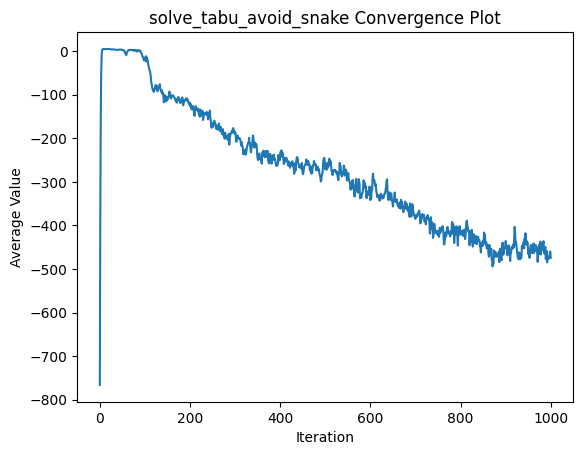

Average solution score: 10.0
Average computation time: 64403638.03 ms.


Summary for: solve_sim_annealing


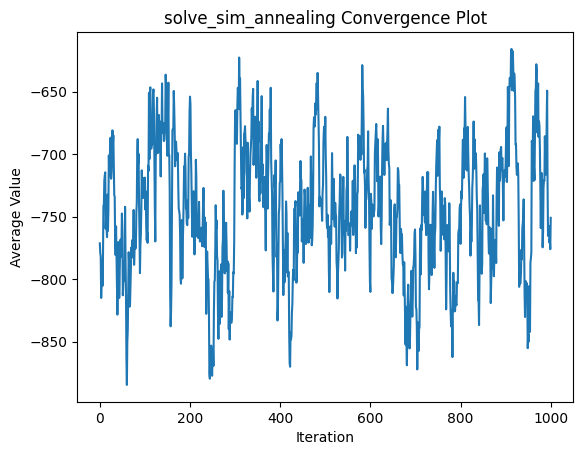

Average solution score: 7.58
Average computation time: 16001627.91 ms.


Summary for: solve_random


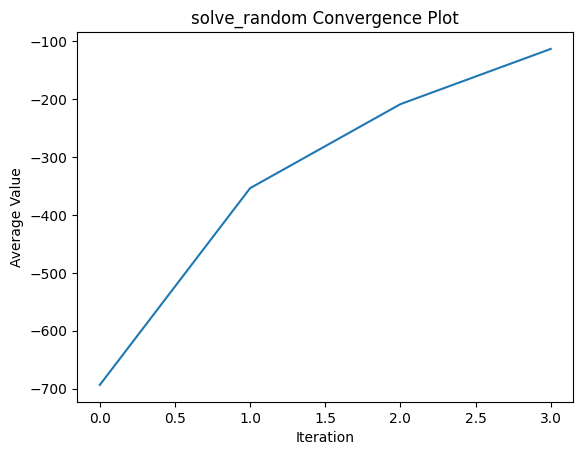

Average solution score: 8.53
Average computation time: 5921001.11 ms.


Summary for: solve_random_n


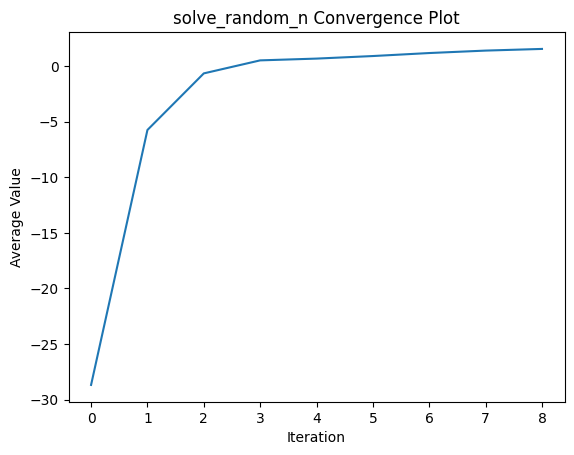

Average solution score: 4.62
Average computation time: 4165327.46 ms.


Summary for: solve_genetic_algorithm_iterations


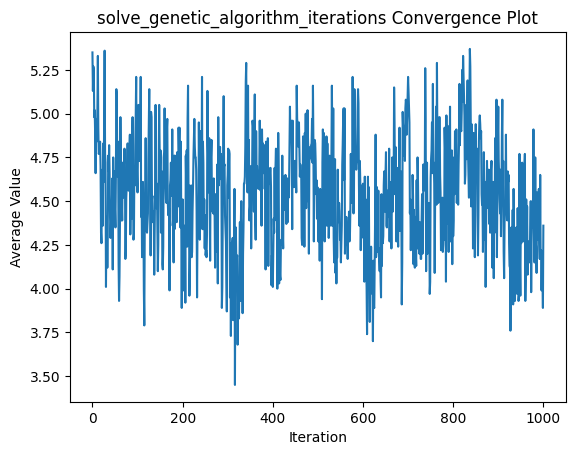

Average solution score: -89.47
Average computation time: 666690977.69 ms.


Summary for: solve_genetic_algorithm


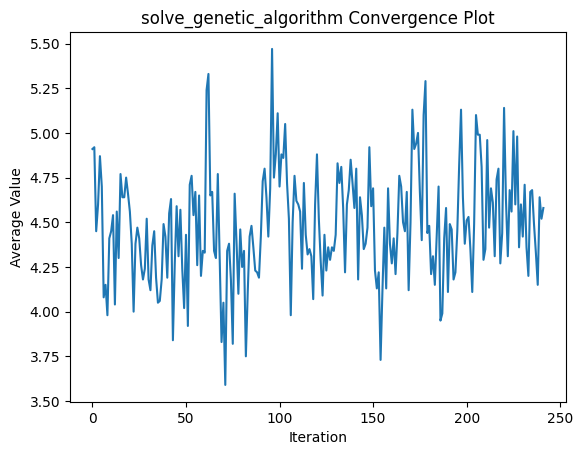

Average solution score: -156.07
Average computation time: 287419274.66 ms.




In [71]:
import subprocess
import os
from statistics import mean

default_problem = "101101011010110110011111011010100010110101111001000010011011101000"

def parse_output(output):
    output_array = output.strip().split(' ')
    score = output_array[1]
    time = output_array[2]
    return float(score), int(time)

def read_conv_log_file():
    with open('conv.log', 'r') as file:
        lines = file.read().strip().split('\n')
        values = [int(line) for line in lines]
    return values

def delete_conv_log_file():
    try:
        os.remove('conv.log')
    except OSError as e:
        print(f"Error deleting file conv.log: {e}")

def add_conv_values(conv_values, new_conv_values):
    if (not conv_values):
        return new_conv_values
    new_array = []
    size1 = len(conv_values)
    size2 = len(new_conv_values)
    new_array_size = size2 if size1 > size2 else size1

    for i in range(new_array_size):
      new_array.append(conv_values[i] + new_conv_values[i])

    return new_array

def calculate_average_conv_values(conv_values, runs_num):
    averages = []
    for e in conv_values:
        averages.append(e / runs_num)
    return averages

def run_experiment(solver, alg_iterations = 1000, problem = default_problem, runs_num = 100):
    results = []
    command = ["./metaheuristics",
               "--solver", solver,
               "--problem", problem,
               "-i", str(alg_iterations)]
    conv_values = []
    
    for i in range(runs_num):
        delete_conv_log_file()
        results.append(parse_output(subprocess.run(command, capture_output=True, text=True).stdout))
        new_conv_values = read_conv_log_file()
        conv_values = add_conv_values(conv_values, new_conv_values)

    conv_values = calculate_average_conv_values(conv_values, runs_num)

    mean_score = mean([item[0] for item in results])
    mean_time = mean([item[1] for item in results])
    return mean_score, mean_time, conv_values

solvers = ["solve_hill_climbing", "solve_tabu", "solve_tabu_list", "solve_tabu_avoid_snake", "solve_sim_annealing", "solve_random", "solve_random_n", "solve_genetic_algorithm_iterations", "solve_genetic_algorithm"]
for solver in solvers:
    results = run_experiment(solver)
    show_results_summary(results, solver)